**Rio de Janeiro, 5 de Junho de 2016**

Aluno: **Carlos Mattoso **_[ **1210553** ]_

Disciplina: **INF1608 - Análise Numérica**

# Lista 6

## _Setup_
Execute o código abaixo para inicializar o ambiente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

m = 1.0
g = 9.8
l = 1.0
d = 0.3
A = 0.1

ta = 0.0
tb = 100.0
y10 = 1.0
y20 = 0.0
n = 10000
h = (tb-ta)/(n+1.0)
X_LIM = 50
T = np.zeros(n+1)
for i in range(n+1):
    T[i] = ta + i*h

def F(t,y1,y2):
    return y2,-g*math.sin(y1)/l-d*y2+A*math.sin(t)

def plot_results(S,V,T, title="Results", x_lim=100):
    fig = plt.gcf()
    fig.set_size_inches(16.5, 8.5)
    plt.plot(T,S,color='blue')
    plt.plot(T,V,color='red')
    deltat = tb - ta
    plt.xlim(ta, tb)
    ymin = min(min(S),min(V))
    ymax = max(max(S),max(V))
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.1*deltay,ymax+0.1*deltay)
    plt.xlim(0,X_LIM)
    plt.title(title, size=24)
    plt.show()

## Método de _Euler_

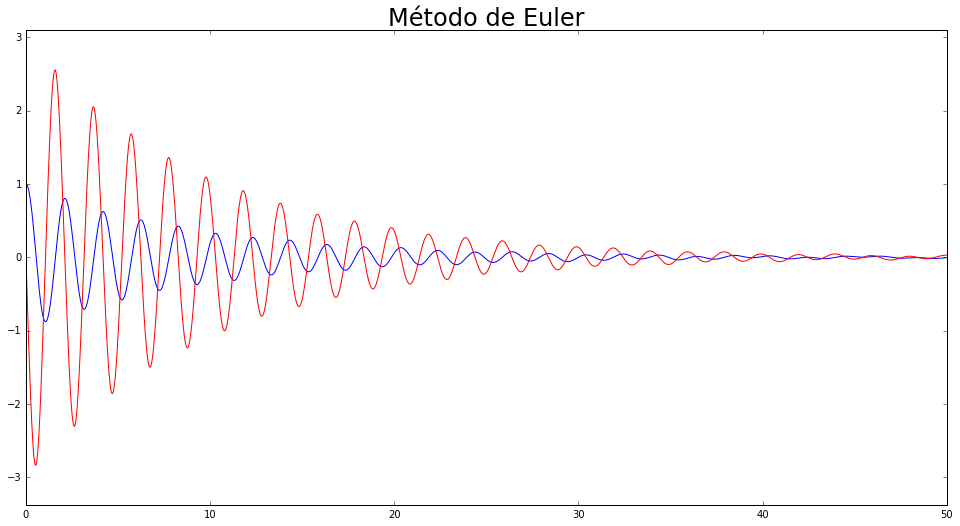

In [2]:
def euler2d(f,ta,tb,y10,y20,n):
    h = (tb-ta)/(n+1.0)
    y1 = np.zeros(n+1)
    y2 = np.zeros(n+1)
    t = ta
    y1[0] = y10
    y2[0] = y20
    for i in range(1,n+1):
        f1,f2 = f(t,y1[i-1],y2[i-1])
        y1[i] = y1[i-1] + h*f1
        y2[i] = y2[i-1] + h*f2        
        t = t + h
    return y1,y2

S,V = euler2d(F,ta,tb,y10,y20,n) 
plot_results(S,V,T,"Método de Euler", x_lim=X_LIM)

## Método do Trapézio

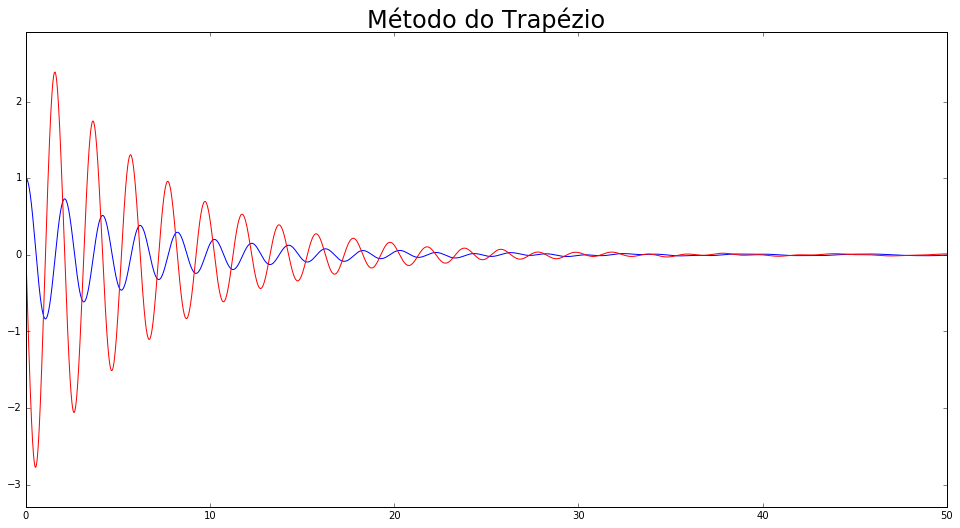

In [3]:
def trapezoid2d(f,ta,tb,y10,y20,n):
    h = (tb-ta)/(n+1.0)
    y1 = np.zeros(n+1)
    y2 = np.zeros(n+1)
    t = ta
    y1[0] = y10
    y2[0] = y20
    for i in range(1,n+1):
        f1_t, f2_t = f(t, y1[i-1], y2[i-1])
        f1_tph, f2_tph = f(t+h, y1[i-1] + h*f1_t, y2[i-1] + h*f2_t)
        y1[i] = y1[i-1] + h*(f1_t + f1_tph)/2.0
        y2[i] = y2[i-1] + h*(f2_t + f2_tph)/2.0
        t = t + h
    return y1,y2

S,V = trapezoid2d(F,ta,tb,y10,y20,n) 
plot_results(S,V,T,"Método do Trapézio", x_lim=X_LIM)

## Método de _Runge-Kutta_

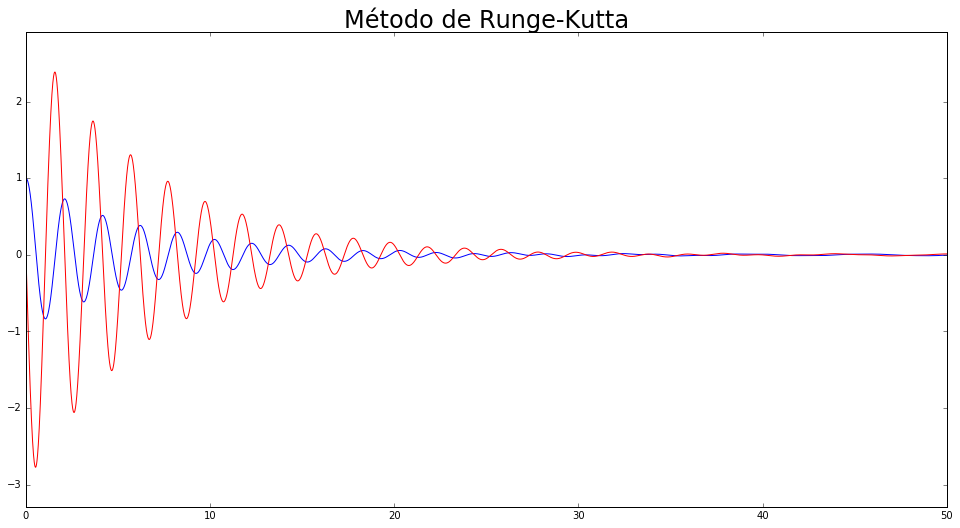

In [4]:
def rk42d(f,ta,tb,y10,y20,n):
    h = (tb-ta)/(n+1.0)
    y1 = np.zeros(n+1)
    y2 = np.zeros(n+1)
    t = ta
    y1[0] = y10
    y2[0] = y20
    for i in range(1,n+1):
        k1_1, k1_2 = f(t, y1[i-1], y2[i-1])
        k2_1, k2_2 = f(t+h/2.0, y1[i-1]+h*k1_1/2.0, y2[i-1]+h*k1_2/2.0)
        k3_1, k3_2 = f(t+h/2.0, y1[i-1]+h*k2_1/2.0, y2[i-1]+h*k2_2/2.0)
        k4_1, k4_2 = f(t+h, y1[i-1]+h*k3_1, y2[i-1]+h*k3_2)
        
        y1[i] = y1[i-1] + h*(k1_1+2.0*k2_1+2.0*k3_1+k4_1)/6.0
        y2[i] = y2[i-1] + h*(k1_2+2.0*k2_2+2.0*k3_2+k4_2)/6.0
        t = t + h
    return y1,y2

S,V = rk42d(F,ta,tb,y10,y20,n) 
plot_results(S,V,T,"Método de Runge-Kutta")